In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv("house_price_regression_dataset.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [6]:
df.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


In [7]:
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


Square_Footage: The size of the house in square feet. Larger homes typically have higher prices.

Num_Bedrooms: The number of bedrooms in the house. More bedrooms generally increase the value of a home.

Num_Bathrooms: The number of bathrooms in the house. Houses with more bathrooms are typically priced higher.

Year_Built: The year the house was built. Older houses may be priced lower due to wear and tear.

Lot_Size: The size of the lot the house is built on, measured in acres. Larger lots tend to add value to a property.

Garage_Size: The number of cars that can fit in the garage. Houses with larger garages are usually more expensive.( garage size are 0,1,2)

Neighborhood_Quality: A rating of the neighborhood’s quality on a scale of 1-10, where 10 indicates a high-quality neighborhood. Better neighborhoods usually command higher prices.

House_Price (Target Variable): The price of the house, which is the dependent variable you aim to predict.

In [28]:
df.isna().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

In [8]:
df['Garage_Size'].value_counts()    

Garage_Size
2    343
1    336
0    321
Name: count, dtype: int64

value_counts() gives you how many times each unique value appears in a column.

In [11]:
target=['House_Price']
cols=['Square_Footage','Num_Bedrooms','Num_Bathrooms','Year_Built','Lot_Size','Garage_Size','Neighborhood_Quality','House_Price']
df[cols].corr()[target]

,House_Price
Square_Footage,0.991261
Num_Bedrooms,0.014633
Num_Bathrooms,-0.001862
Year_Built,0.051967
Lot_Size,0.160412
Garage_Size,0.052133
Neighborhood_Quality,-0.007770
House_Price,1.000000


It shows:

how strongly each feature is related to the target

higher value = stronger relationship

negative means inverse relationship

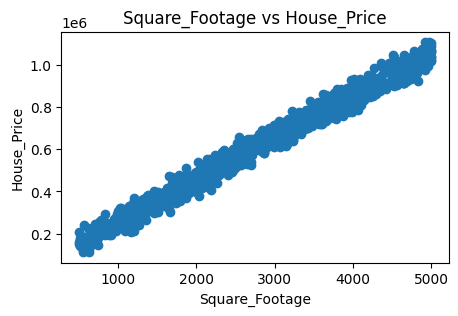

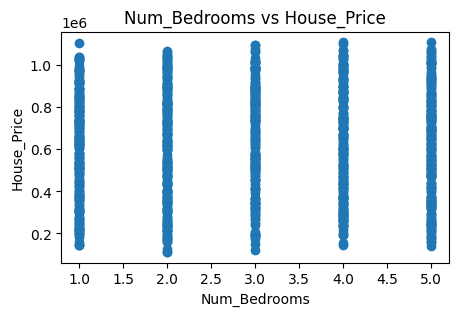

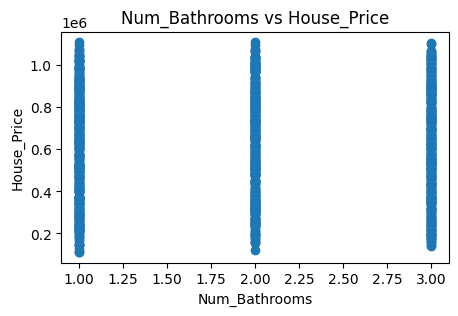

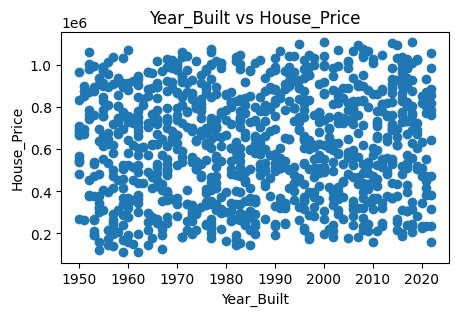

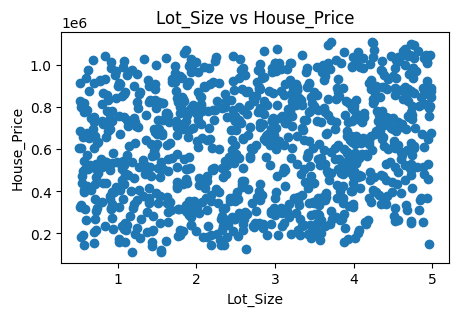

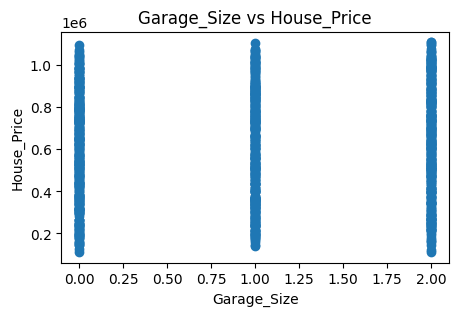

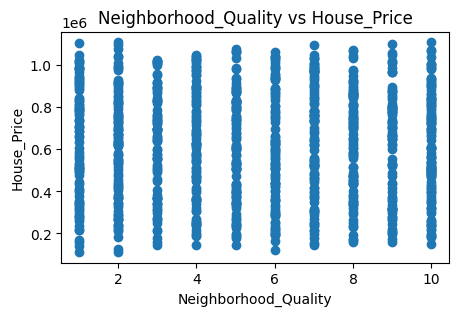

In [12]:
features = [
    'Square_Footage',
    'Num_Bedrooms',
    'Num_Bathrooms',
    'Year_Built',
    'Lot_Size',
    'Garage_Size',
    'Neighborhood_Quality'
]

for col in features:
    plt.figure(figsize=(5,3))
    plt.scatter(df[col], df['House_Price'])
    plt.xlabel(col)
    plt.ylabel('House_Price')
    plt.title(f'{col} vs House_Price')
    plt.show()


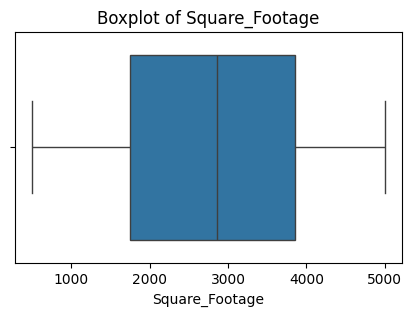

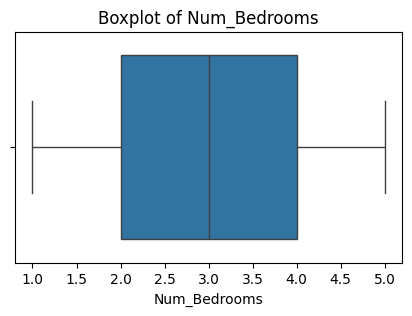

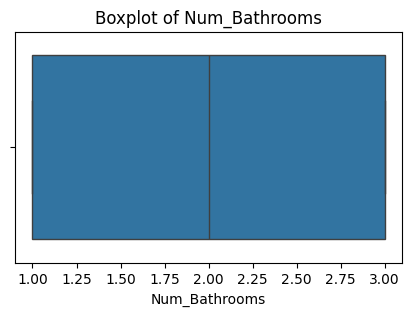

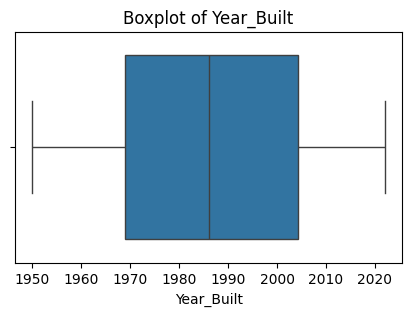

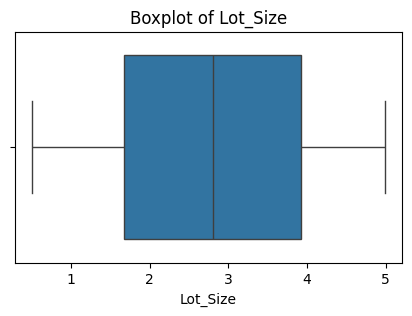

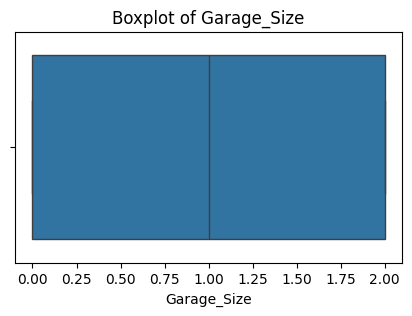

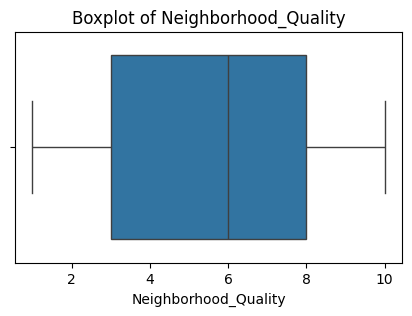

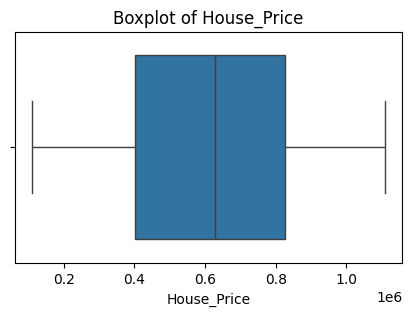

In [13]:
import seaborn as sns

features = [
    'Square_Footage',
    'Num_Bedrooms',
    'Num_Bathrooms',
    'Year_Built',
    'Lot_Size',
    'Garage_Size',
    'Neighborhood_Quality',
    'House_Price'
]

for col in features:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()


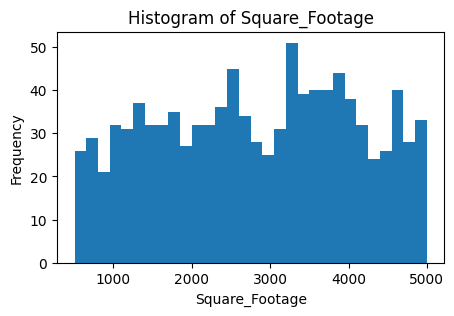

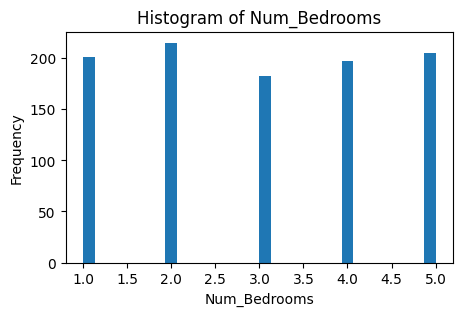

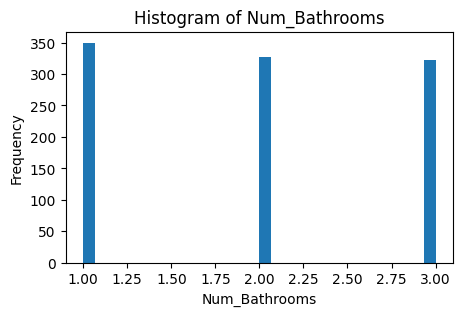

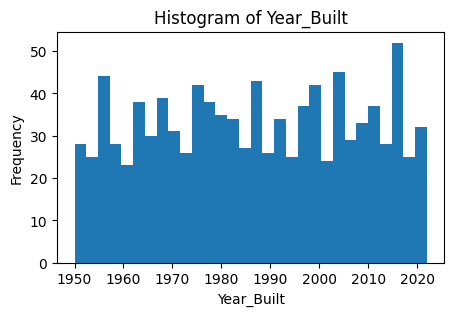

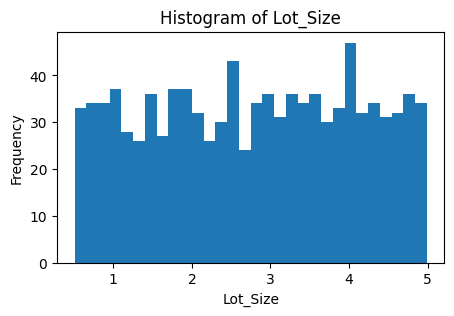

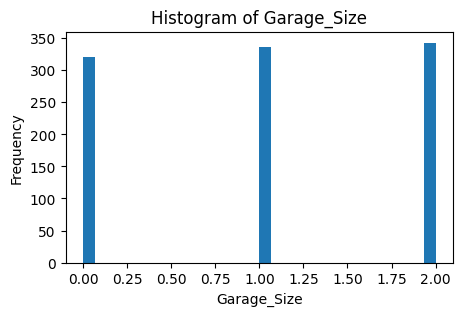

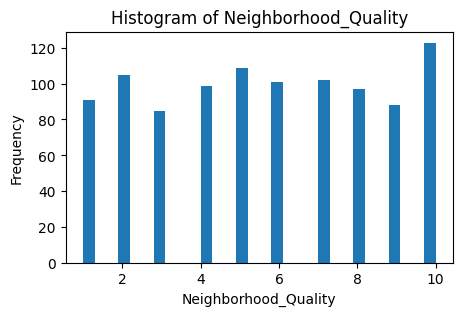

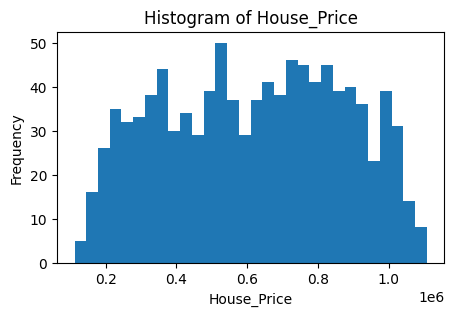

In [14]:
features = [
    'Square_Footage',
    'Num_Bedrooms',
    'Num_Bathrooms',
    'Year_Built',
    'Lot_Size',
    'Garage_Size',
    'Neighborhood_Quality',
    'House_Price'
]

for col in features:
    plt.figure(figsize=(5,3))
    plt.hist(df[col], bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

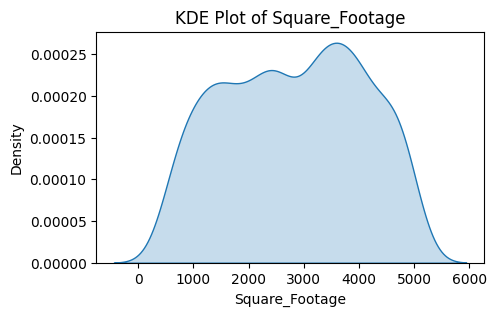

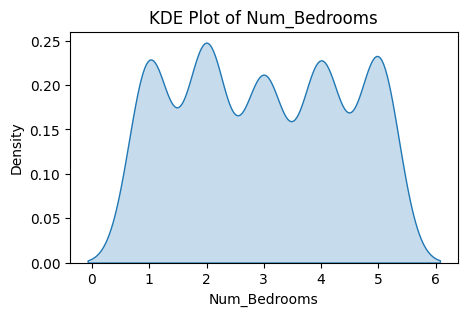

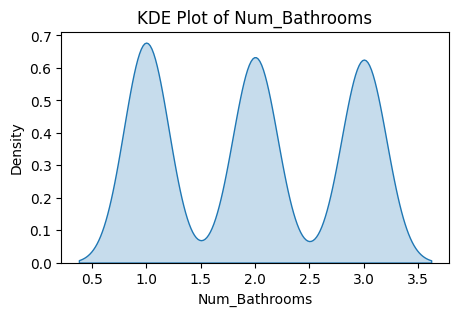

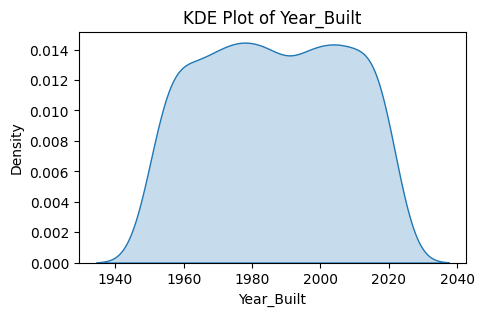

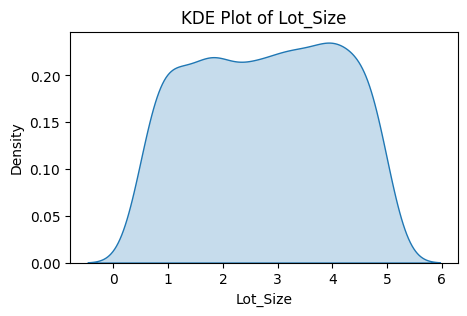

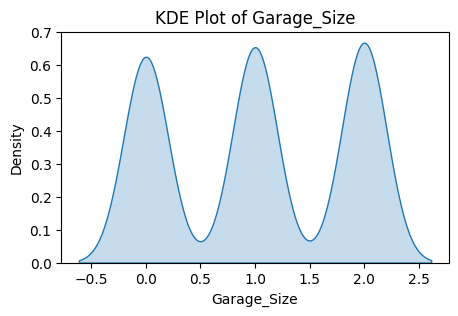

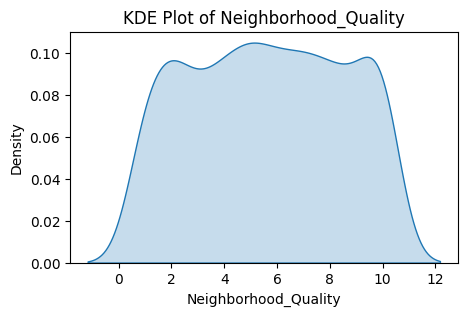

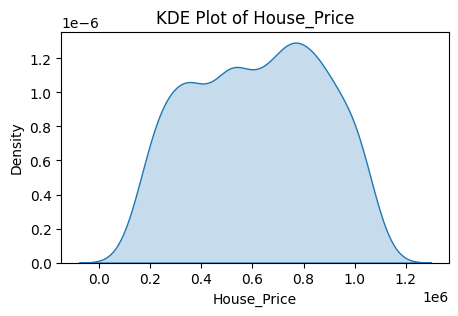

In [15]:
features = [
    'Square_Footage',
    'Num_Bedrooms',
    'Num_Bathrooms',
    'Year_Built',
    'Lot_Size',
    'Garage_Size',
    'Neighborhood_Quality',
    'House_Price'
]

for col in features:
    plt.figure(figsize=(5,3))
    sns.kdeplot(df[col], fill=True)
    plt.title(f'KDE Plot of {col}')
    plt.xlabel(col)
    plt.show()


In [25]:
from scipy.stats import f_oneway

groups = []
for q in df['Neighborhood_Quality'].unique():
    groups.append(df[df['Neighborhood_Quality'] == q]['House_Price'])

p=f_oneway(*groups)[1]
print("p value is:",p)

if p>0.05:
    print("Accept Null Hypothesis")
else:
    print("Reject NuLL Hypothesis")


p value is: 0.8847212743720869
Accept Null Hypothesis


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
# Features (X) and Target (y)
X = df[['Square_Footage','Num_Bedrooms','Num_Bathrooms','Year_Built',
        'Lot_Size','Garage_Size','Neighborhood_Quality']]

y = df['House_Price']


In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)


(800, 7) (200, 7) (800,) (200,)


In [36]:
model=LinearRegression()
model.fit(X_train,y_train)
yhat=model.predict(X_test)
print(yhat)
yhat.shape

[ 503205.77225909  385531.70228673  316193.81171796  863133.9237658
  803428.78525907  291411.53547868  224218.44391266  938199.56917044
  151319.87379144  782300.62133847  207687.40753488  833544.34233048
  912791.92409958  455710.62083307  328117.9709627   252057.3265365
  264268.54163304  821339.94653923  820090.85839441  906234.04824428
  613996.96502522  623471.4505894   592696.48632018  717063.04742836
  223042.85025896  449416.27079586  760565.53384908  288227.31761592
  540185.19832041  746792.87024066 1007174.73348545  375613.6602253
  509597.04148164 1001371.6004958   241075.46121998  223974.69958385
  663882.31188001  340204.86675023  926801.3323106   823711.33759942
  851887.02435131  418451.97837516  722050.53947006  454210.11450599
  909833.96864231  896054.75083754 1046260.40352378  693620.60012827
  697585.70528291  697936.5733209   871299.58018697  716953.06087259
  793662.89823749  646567.51387316  342334.50414455  580883.65907553
  732390.4421322   527204.50923202  5

(200,)

In [39]:
mse = mean_squared_error(y_test, yhat)
rmse = mse**0.5
r2 = r2_score(y_test, yhat)

print("RMSE:", rmse)
print("R2 Score:", r2)

# Coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

RMSE: 9765.985598740046
R2 Score: 0.998412760451372
Intercept: -2004197.460201851
Coefficients: [  199.86131479 10150.56609702  8210.69222216   990.11284967
 14882.51541359  5127.9389372     65.19465598]


['Square_Footage','Num_Bedrooms','Num_Bathrooms','Year_Built',
        'Lot_Size','Garage_Size','Neighborhood_Quality']